# 0.0 IMPORTS 

In [2]:
import pandas as pd
# import psycopg2 as pg
import seaborn as sns
import pickle
import scikitplot as skplt
import matplotlib.patches as mpatches
from datetime import date
import datetime

from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import neighbors as nh
from sklearn import linear_model as lm

from matplotlib import pyplot as plt
from IPython.core.display  import HTML
from IPython.display       import Image

from sklearn import preprocessing as pp

### 0.0.1 Helper Functions


In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [15, 8]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
 #   pd.options.display.max_columns = None
 #   pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
    # Central Tendency -  media e mediana - são metricas de tendência central (central tendency)

def descriptive_statistical(x):
    ct1 = pd.DataFrame( x.apply(np.mean)).T
    ct2 = pd.DataFrame( x.apply(np.median)).T
    
    # Dispersion - desvio padrão, variância, range. min, max, skew, curtosis  - são metricas de dispersão
    d1 = pd.DataFrame( x.apply( np.std ) ).T
    d2 = pd.DataFrame( x.apply( min )).T
    d3 = pd.DataFrame( x.apply( max )).T
    d4 = pd.DataFrame( x.apply(lambda x: x.max() -  x.min() ) ).T
    d5 = pd.DataFrame( x.apply(lambda x: x.skew() ) ).T
    d6= pd.DataFrame( x.apply(lambda x: x.kurtosis() ) ).T
                      
    #concatenate
    m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
    m.columns = ['attributes','min','max','range','mean','median','std','skew','Kurtosis',]
    
    return m

def cramer_v ( x,y ):
    cm= pd.crosstab(x,y).values
    n = cm.sum()
    r,k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr= k - (k-1)**2 / (n-1)
    rcorr= r - (r-1)**2 / (n-1)
    
        
    return np.sqrt( ( chi2corr/n ) / ( min( kcorr-1, rcorr-1 ) ) )


In [4]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.1 Database Conection

### 0.1.1 Set Credentials

In [4]:
# # Credentials
# host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
# port = 5432
# database = 'comunidadedsdb'
# username = 'member'
# pwd = 'cdspa'

### 0.1.2 Criar conexão - conn 

In [5]:
# conn = pg.connect( user=username,
#                    password=pwd,
#                    host=host,
#                    port=port,
#                    database=database )

NameError: name 'pg' is not defined

###  0.1.3  Criar cursor 
**Cursor é um ponteiro que vai apontar para onde estão meus dados, após isso podemos criar as queries**

In [13]:
# cursor = conn.cursor()

### 0.1.4 Criação/execução das queries
**SEMPRE FECHAR A CONEXÃO APÓS USO DO DATABASE**

In [14]:
# query_tables = """
#     SELECT tablename
#     FROM pg_tables
#     WHERE schemaname = 'pa004'
# """

# cursor.execute(query_tables)

# record = cursor.fetchall()
# print(record)

# cursor.close()
# conn.close()

### 0.1.5 Collect Data using Psycopg2 

In [15]:
# cursor = conn.cursor()

# query_table_users = """
#     SELECT *
#     FROM pa004.users u
#     WHERE u.age > 44
#     LIMIT 10
# """

# cursor.execute(query_table_users)

# record = cursor.fetchall()
# print(record)

# cursor.close()
# conn.close()

### 0.1.6 Collect Data using Pandas 

In [4]:
# conn = pg.connect( user=username,
#                    password=pwd,
#                    host=host,
#                    port=port,
#                    database=database )

In [5]:
# query_table_users = """
#     SELECT *
#     FROM pa004.users u LEFT JOIN pa004.vehicle v ON ( u.id = v.id)
#                        LEFT JOIN pa004.insurance i ON ( u.id = i.id)
# """

In [6]:
# df = pd.read_sql(query_table_users,conn)
# df_raw = df.copy()

## 0.2 Loadind data from csv 

In [5]:
df0 = pd.read_csv('data/pa004.csv')
df0=df0.drop(['id.1','id.2'],axis=1)

# 1.0 DATA DESCRITION

In [6]:
#loading csv dataset
df1 = df0.copy()

**Id:** identificador único do cliente.

**Gender:** gênero do cliente.

**Age:** idade do cliente.

**Driving License:** 0, o cliente não tem permissão para dirigir e 1, o cliente tem para dirigir ( CNH – Carteira 
Nacional de Habilitação )

**Region Code:** código da região do cliente.

**Previously Insured:** 0, o cliente não tem seguro de automóvel e 1, o cliente já tem seguro de automóvel.

**Vehicle Age:** idade do veículo.

**Vehicle Damage:** 0, cliente nunca teve seu veículo danificado no passado e 1, cliente já teve seu veículo danificado no passado.

**Anual Premium:** quantidade que o cliente pagou à empresa pelo seguro de saúde anual.

**Policy sales channel:** código anônimo para o canal de contato com o cliente.

**Vintage:** número de dias que o cliente se associou à empresa através da compra do seguro de saúde.

**Response:** 0, o cliente não tem interesse e 1, o cliente tem interesse.

## 1.1 Rename columns

In [7]:
df1.columns

Index(['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
       'driving_license', 'vehicle_age', 'vehicle_damage',
       'previously_insured', 'annual_premium', 'vintage', 'response'],
      dtype='object')

**Colums as already in snake_case**

## 1.2 Data dimensions

In [8]:
print(f'Total de colunas {df1.shape[1]}')
print(f'Total de linhas {df1.shape[0]}')

Total de colunas 12
Total de linhas 381109


## 1.3 Data types

In [9]:
df1.dtypes 

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

In [10]:
df1.head(5)

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.0,152.0,1,< 1 Year,Yes,0,23367.0,249,0
1,13,Female,41,15.0,14.0,1,1-2 Year,No,1,31409.0,221,0
2,18,Female,25,35.0,152.0,1,< 1 Year,No,1,46622.0,299,0
3,31,Female,26,8.0,160.0,1,< 1 Year,No,0,2630.0,136,0
4,39,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0


## 1.5 Check NA

In [11]:
df1.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

## 1.6 Descriptive statistical

In [12]:
num_attributes=df1[['age','annual_premium', 'vintage','policy_sales_channel','region_code','driving_license','previously_insured']]

cat_attributes=(df1.select_dtypes(exclude=['float64', 'int64']))


### 1.6.1 Numerial Attributes

In [13]:
# função criada para calcular
descriptive_statistical(num_attributes)

,attributes,min,max,range,mean,median,std,skew,Kurtosis
0,age,20.0,85.0,65.0,38.822584,36.0,15.511591,0.672539,-0.565655
1,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087,34.004569
2,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,0.003030,-1.200688
3,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-0.900008,-0.970810
4,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-0.115266,-0.867857
5,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-21.595182,464.354302
6,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,0.167747,-1.971871


### 1.3.2 Categorical Attributes

In [14]:
cat_attributes.head()

,gender,vehicle_age,vehicle_damage
0,Male,< 1 Year,Yes
1,Female,1-2 Year,No
2,Female,< 1 Year,No
3,Female,< 1 Year,No
4,Male,1-2 Year,Yes


In [15]:
cat_attributes.apply(lambda x: x.unique().shape[0])

gender            2
vehicle_age       3
vehicle_damage    2
dtype: int64

#### 1.3.2.1 Gender, vehicle age, vehicle_damage

<AxesSubplot:xlabel='vehicle_damage', ylabel='response'>

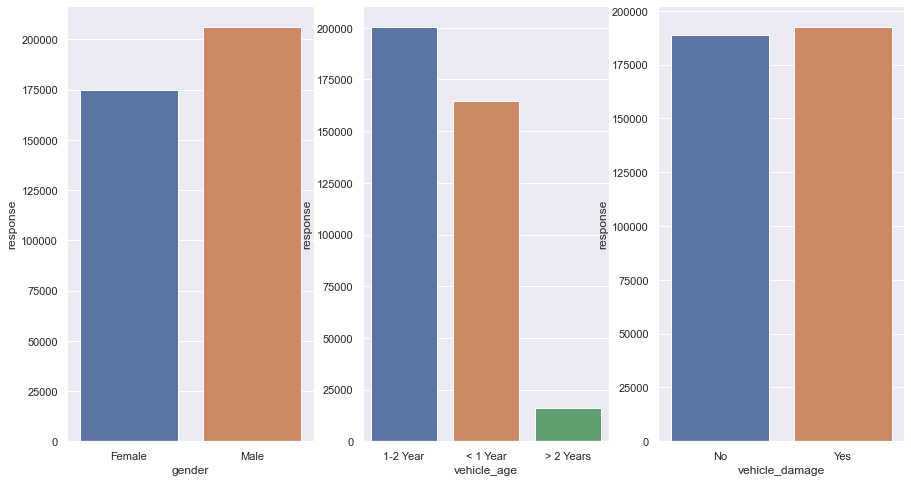

In [16]:
# gender
plt.subplot(1, 3, 1)
aux1 = df1[['gender','response']].groupby('gender').count().reset_index()
sns.barplot(x='gender', y='response', data=aux1)

# vehicle age
plt.subplot(1, 3, 2)
aux2 = df1[['vehicle_age','response']].groupby('vehicle_age').count().reset_index()
sns.barplot(x='vehicle_age', y='response', data=aux2)

# vehicle_damage    
plt.subplot(1, 3, 3)
aux3 = df1[['vehicle_damage', 'response']].groupby('vehicle_damage').count().reset_index()
sns.barplot(x='vehicle_damage', y='response', data=aux3)


### 1.3.2.2 Vehicle damage per gender

<AxesSubplot:xlabel='gender', ylabel='response'>

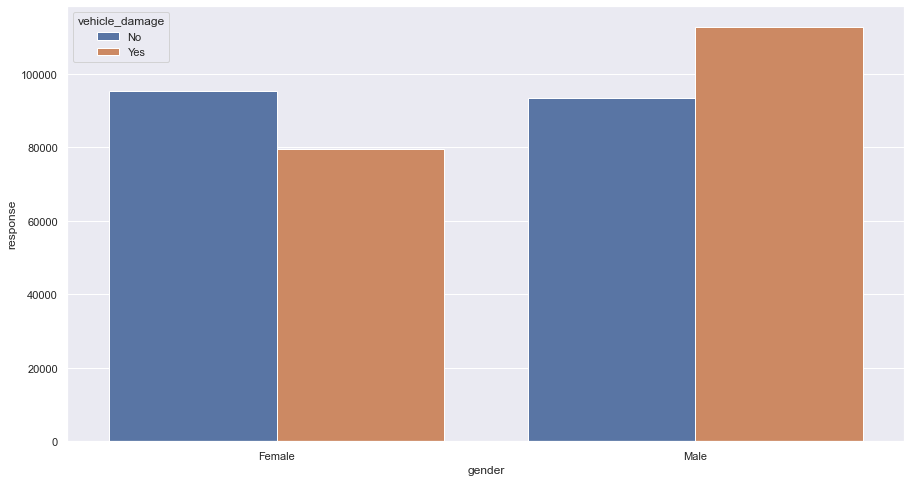

In [17]:
aux3 = df1[['vehicle_damage', 'gender','response']].groupby(['vehicle_damage', 'gender']).count().reset_index()
sns.barplot(x='gender', y='response',hue='vehicle_damage', data=aux3)

# 2.0 FEATURE ENGINEERING

### 2.0.1 Test dataset separation

In [18]:
# separando dados de teste

# removendo a variavel target dos dados de teste 
X = df1.drop('response', axis=1)

#salvando variavel target para validação
y = df1['response'].copy() 

X_train, x_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.10 )

df2 = pd.concat([X_train,y_train], axis=1)

In [19]:
# X_train.head() # Dados de treino, sem variável resposta.
# x_test.head() # Dados de teste sem variável resposta.
# y_test.head() # Variável resposta para o teste final.
# y_train.head() # Variável resposta dos dados de treino

df2.head(10) # df2 =  X_train e y_train contatenados, desse df ainda será feita a divisão entre treino e validação posteriormente


,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
293267,56708,Female,33,46.0,124.0,1,< 1 Year,Yes,0,34006.0,285,0
140587,362078,Male,42,28.0,124.0,1,1-2 Year,No,1,31838.0,139,0
216880,207889,Female,51,11.0,120.0,1,1-2 Year,Yes,0,36539.0,24,1
187253,353531,Female,29,28.0,152.0,1,< 1 Year,No,1,40485.0,209,0
230628,317450,Female,23,11.0,152.0,1,< 1 Year,No,1,2630.0,109,0
157421,114279,Male,24,15.0,152.0,1,< 1 Year,No,1,43815.0,100,0
142958,380749,Female,38,4.0,152.0,1,1-2 Year,No,1,38951.0,34,0
58436,85583,Male,21,25.0,160.0,1,< 1 Year,No,1,48028.0,210,0
80027,257837,Male,21,36.0,160.0,1,< 1 Year,Yes,1,55053.0,235,0
172369,234707,Female,57,17.0,26.0,1,1-2 Year,Yes,0,2630.0,147,0


## 2.1 Hypotesis mental map

**I dind't think it was necessary for this problem**

## 2.2 Hypotesis Creation

**1. Older vehicle should be less interested in insurance**

**2. Female gender should be less interented in insurance**

**3. Older people should be more interested in insurance**

**4. People who already used insurance should be more interested**

**5. People who already used insurance should be more interested**

**6. People that never had any previus insurance should be less interested**

**7. People who pay higher annual_premium must be more interested in hiring the insurance**

**8. People who got a driver license should be more interested**

**9. People who have been associated longer, should be more interested**

## 2.3 Feature Engineering

In [20]:
#vehicle age

df2['vehicle_age'] = df2['vehicle_age'].apply( lambda x: 'below_1_year' if x ==  '< 1 Year' else 'between_1_2_year' if x == '1-2 Year' else 'above_2_years' )

#vehicle damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply( lambda x: 1 if x ==  'Yes' else 0 )

# getting date of subscription
df2['subscription_date'] = df2['vintage'].apply( lambda x: date.today() - datetime.timedelta(days= x))

# converting to datetime
df2['subscription_date']=pd.to_datetime(df2['subscription_date'])

# month
df2['month'] = df2['subscription_date'].dt.month

# week fo year
df2['week_of_year'] = df2['subscription_date'].dt.isocalendar().week
df2['week_of_year'] = df2['week_of_year'].astype('int64')

# year week
df2['year_week'] = df2['subscription_date'].dt.strftime('%Y-%W')

In [21]:
df2['previously_insured'].unique()

array([0, 1], dtype=int64)

# 3.0 DATA FILTERING


**Não existem variáveis a serem filtradas **

# 4.0 EXPLORATORY DATA ANALYSIS


In [22]:
df4 = df2.copy()

In [23]:
df4['previously_insured'].unique()

array([0, 1], dtype=int64)

## 4.1 Univariate Analysis

### 4.1.1  Response variable

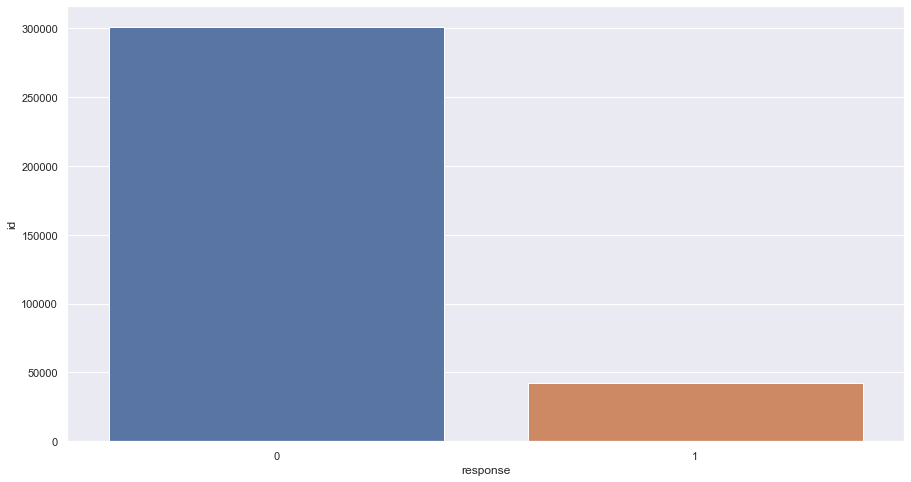

In [27]:
# Response 
aux = df4[['response','id']].groupby('response').count().reset_index()
sns.barplot(x= 'response', y='id', data=aux);

### 4.1.2  Numerical variable

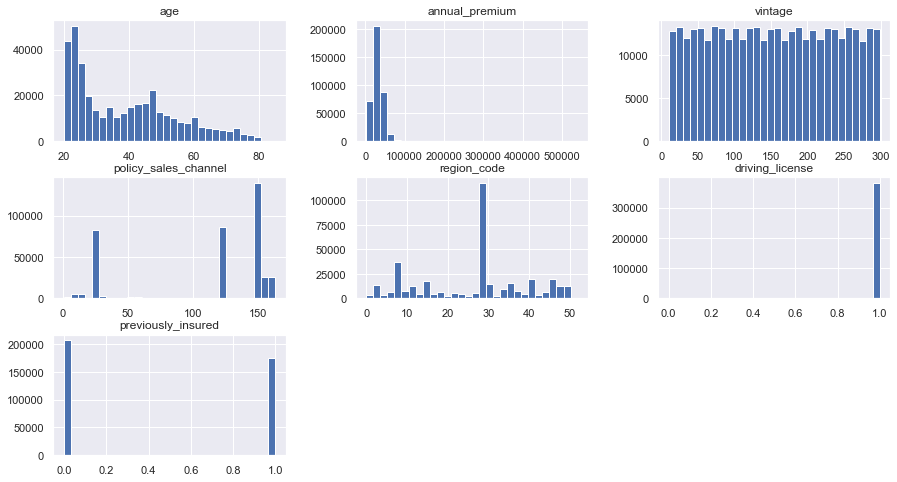

In [20]:
num_attributes.hist(bins=30);

### 4.1.3  Categorical variable

In [24]:
cat_attributes.sample(10)

,gender,vehicle_age,vehicle_damage
369368,Male,> 2 Years,Yes
149857,Female,1-2 Year,Yes
175973,Male,1-2 Year,Yes
173531,Female,< 1 Year,No
173290,Male,1-2 Year,No
166939,Male,1-2 Year,Yes
371647,Male,< 1 Year,No
327436,Female,< 1 Year,Yes
318663,Male,< 1 Year,No
8581,Female,1-2 Year,Yes


c:\Users\vande\repos\cross_sell\env-cross-sell\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\vande\repos\cross_sell\env-cross-sell\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\vande\repos\cross_sell\env-cross-sell\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

<AxesSubplot:xlabel='response', ylabel='Density'>

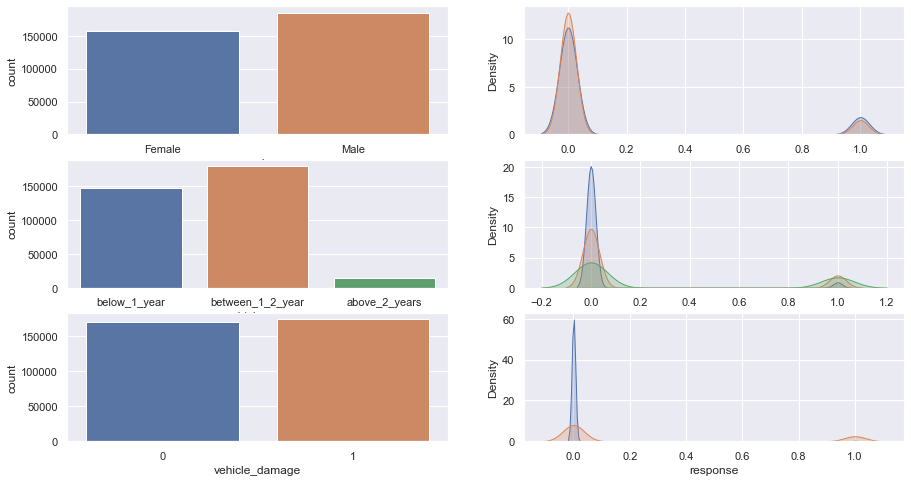

In [25]:
# gender
plt.subplot(3,2,1)
sns.countplot(df4['gender'])

plt.subplot(3,2,2)
sns.kdeplot(df4[df4['gender']=='Male']['response'], label= 'Male', shade=True )
sns.kdeplot(df4[df4['gender']=='Female']['response'], label= 'Female', shade=True )

# vehicle_age
plt.subplot(3,2,3)
sns.countplot(df4['vehicle_age'])

plt.subplot(3,2,4)
sns.kdeplot(df4[df4['vehicle_age']=='below_1_year']['response'], label= 'below_1_year', shade=True )
sns.kdeplot(df4[df4['vehicle_age']=='between_1_2_year']['response'], label= 'between_1_2_year', shade=True )
sns.kdeplot(df4[df4['vehicle_age']=='above_2_years']['response'], label= 'above_2_years', shade=True )

# vehicle_damage
plt.subplot(3,2,5)
sns.countplot(df4['vehicle_damage'])

plt.subplot(3,2,6)
sns.kdeplot(df4[df4['vehicle_damage']==0]['response'], label= 'no', shade=True )
sns.kdeplot(df4[df4['vehicle_damage']==1]['response'], label= 'yes', shade=True )


## 4.2 Bivariate Analysis

### **H1. Older vehicle should be less interested in insurance**
**False** - the mid-age vehicles are more interested

<AxesSubplot:xlabel='vehicle_age', ylabel='response'>

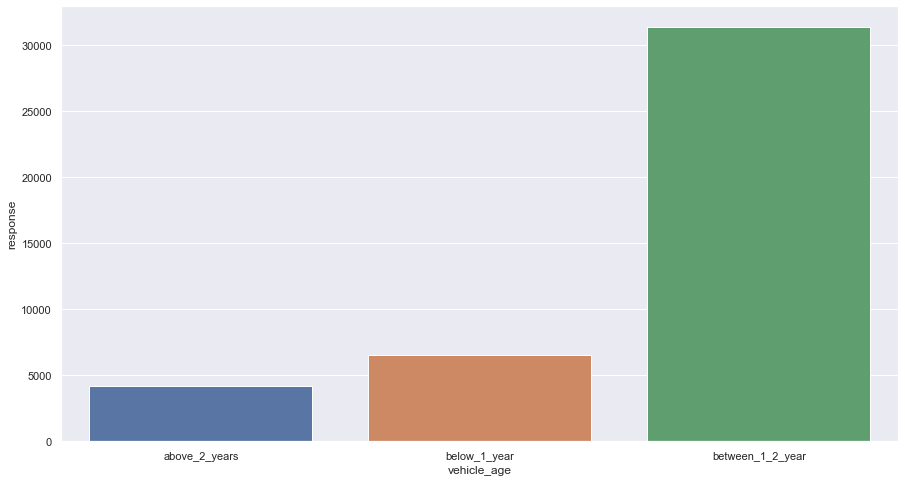

In [26]:
aux1 = df4[['vehicle_age','response']].groupby('vehicle_age').sum().reset_index()
sns.barplot(x='vehicle_age', y='response', data=aux1)

### **H2. Female gender should be less interented in insurance**
**True** - Female gender is less interented in insurance

<AxesSubplot:xlabel='gender', ylabel='response'>

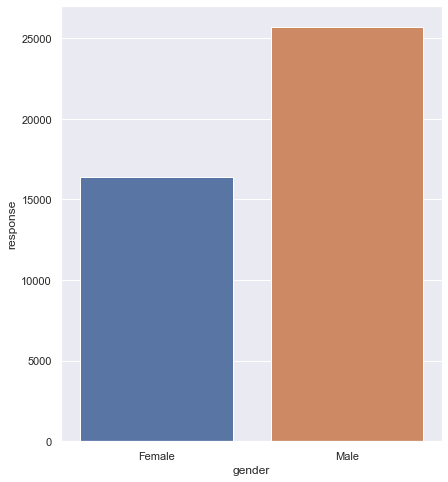

In [27]:
from scipy.stats import pointbiserialr
plt.subplot(1,2,1)

aux= df4[['gender','response']].groupby('gender').sum().reset_index()
sns.barplot(x='gender',y='response',data=aux)


### **H3. Older people should be more interested in insurance**
**False** - Older people as less interested in insurance

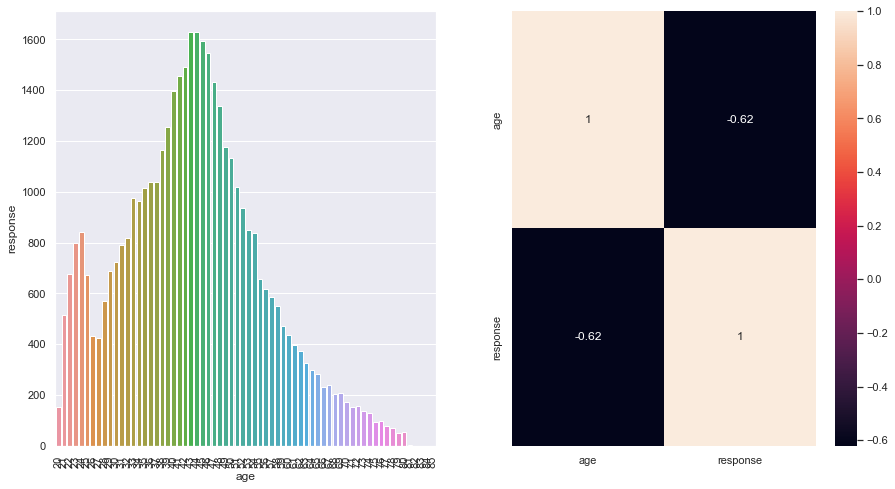

In [28]:
aux = df4[['age','response']].groupby('age').sum().reset_index()
plt.subplot(1,2,1)
sns.barplot(x='age', y='response',data=aux)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
x=sns.heatmap(aux.corr( method='pearson' ), annot=True )


### **H4. People who already used insurance should be more interested**
**False** - Pleople tha already used insurance are less likely to hire a insurance

<AxesSubplot:xlabel='response', ylabel='previously_insured'>

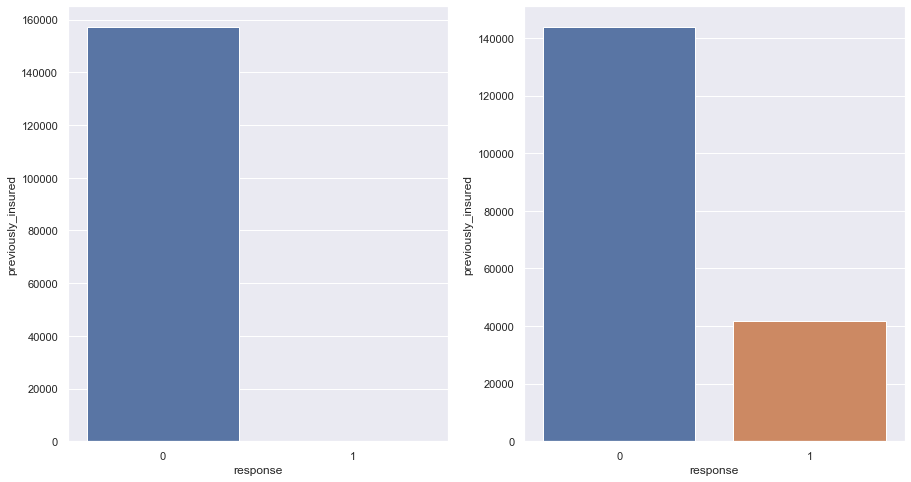

In [29]:
plt.subplot(1,2,1)
aux1= df4[df4['previously_insured'] == 1]
aux =  aux1[['previously_insured','response']].groupby('response').count().reset_index()
sns.barplot(x='response', y='previously_insured', data=aux)

plt.subplot(1,2,2)
aux1= df4[df4['previously_insured'] == 0]
aux =  aux1[['previously_insured','response']].groupby('response').count().reset_index()
sns.barplot(x='response', y='previously_insured', data=aux)

**H5. People that never had any previus insurance should be less interested than who already have an insurance**

**False** - People that never had any previus insurance are more interested than people who have an insurance. (as we can see above)

**H6. People who pay higher annual_premium must be more interested in hiring the insurance**
**False** - People who pay higher annual_premium are less interested in hiring the insurance

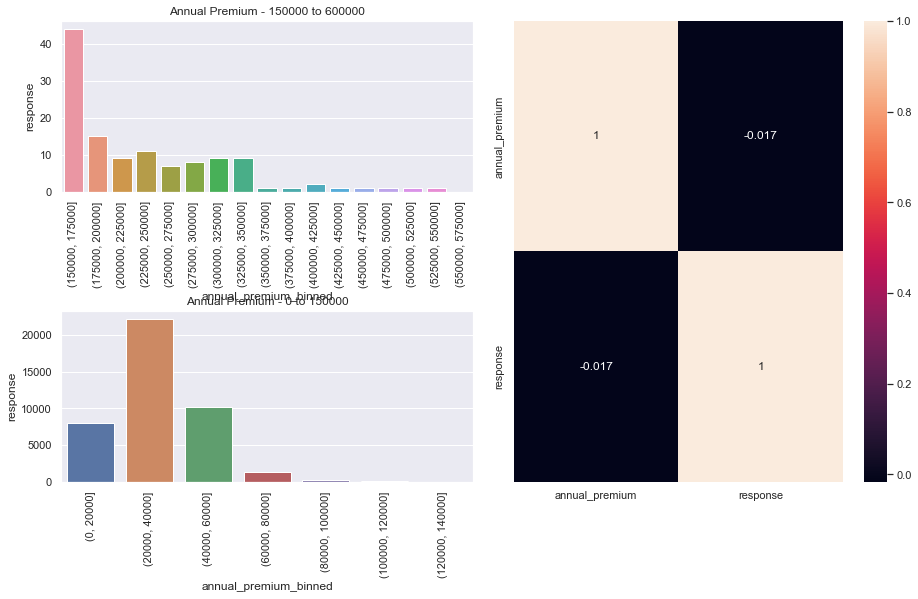

In [30]:

grid = GridSpec(2,2)
plt.subplot(grid[0,0])
aux =df4[['annual_premium','response']].groupby('annual_premium').count().reset_index()
bins = list(np.arange(150000, 600000, 25000))


aux['annual_premium_binned'] = pd.cut(aux['annual_premium'], bins=bins)
aux1= aux[['annual_premium_binned', 'response']].groupby('annual_premium_binned').count().reset_index()
ax=sns.barplot(x='annual_premium_binned', y='response', data=aux1)
ax=xticks(rotation=90)
ax=plt.title('Annual Premium - 150000 to 600000')





plt.subplot(grid[1,0])
aux3 =df4[['annual_premium','response']].groupby('annual_premium').sum().reset_index()
bins = list(np.arange(0, 150000, 20000))


aux3['annual_premium_binned'] = pd.cut(aux3['annual_premium'], bins=bins)
aux4= aux3[['annual_premium_binned', 'response']].groupby('annual_premium_binned').sum().reset_index()
ax=sns.barplot(x='annual_premium_binned', y='response', data=aux4)
ax=xticks(rotation=90)
ax=plt.title('Annual Premium - 0 to 150000')

plt.subplot(grid[:,1])
sns.heatmap(aux.corr(method = 'pearson' ),annot=True)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.7)


**H7. People who got a driver license should be more interested**
****

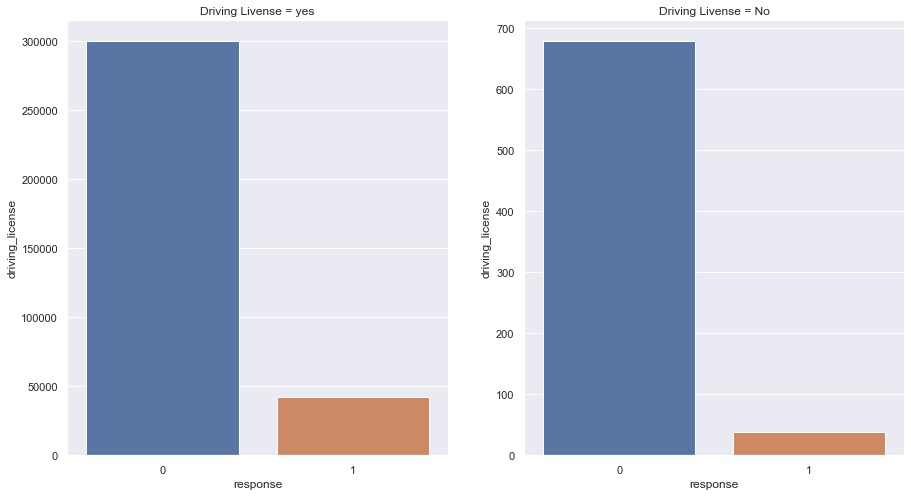

In [31]:
# Have driving_license
plt.subplot(1,2,1)
aux1 = df4[df4['driving_license']==1]
aux = aux1[['driving_license','response']].groupby('response').count().reset_index()
ax = sns.barplot(x='response', y='driving_license', data=aux)
ax= plt.title('Driving Livense = yes')

# No drinving license
plt.subplot(1,2,2)
aux2 = df4[df4['driving_license']==0]
aux3 = aux2[['driving_license','response']].groupby('response').count().reset_index()
ax1 = sns.barplot(x='response', y='driving_license', data=aux3)
ax1= plt.title('Driving Livense = No')

In [36]:
aux['dl_%'] = round(aux['driving_license'].apply(lambda x : (x / len(aux1)*100)),2)
aux3['no_dl_%'] = round(aux3['driving_license'].apply(lambda x : (x / len(aux2)*100)),2)

df_percent= pd.merge(aux,aux3, how='left', on='response')
df_percent.rename(columns={'driving_license_x': 'driving_license', 'driving_license_y': 'no_driving_license'})


,response,driving_license,dl_%,no_driving_license,no_dl_%
0,0,300258,87.72,679,94.7
1,1,42023,12.28,38,5.3


c

**9. People who have been associated longer, should be more interested**

<AxesSubplot:xlabel='age', ylabel='Count'>

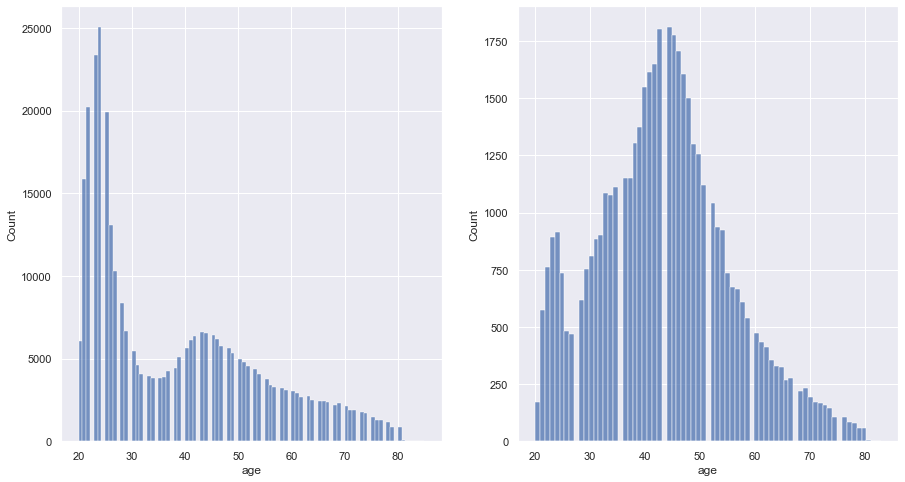

In [12]:
plt.subplot(1,2,1)
aux00 = df4.loc[df4['response'] == 0,'age']
sns.histplot(aux00)


plt.subplot(1,2,2)
aux00 = df4.loc[df4['response'] == 1,'age']
sns.histplot(aux00)

In [19]:
# 'annual_premium'

<AxesSubplot:xlabel='response', ylabel='annual_premium'>

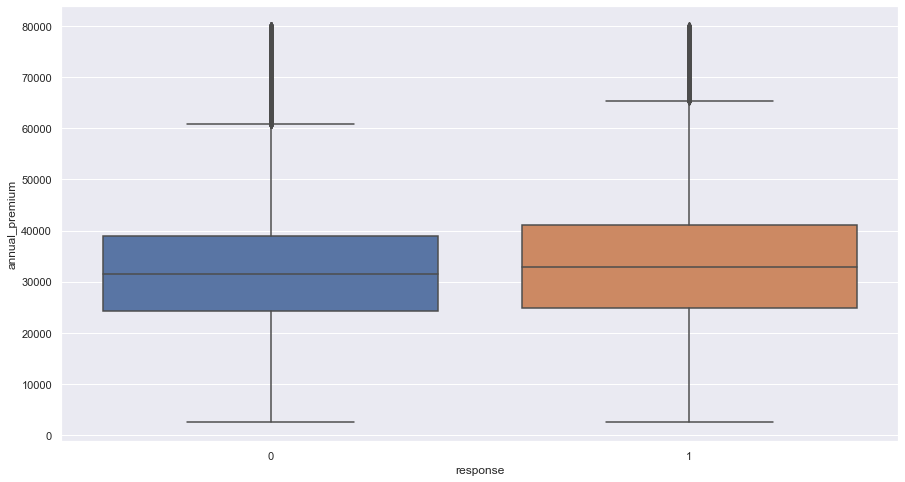

In [20]:
aux= df4[df4['annual_premium'] < 80000]
sns.boxplot(x='response', y='annual_premium', data=aux)


<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

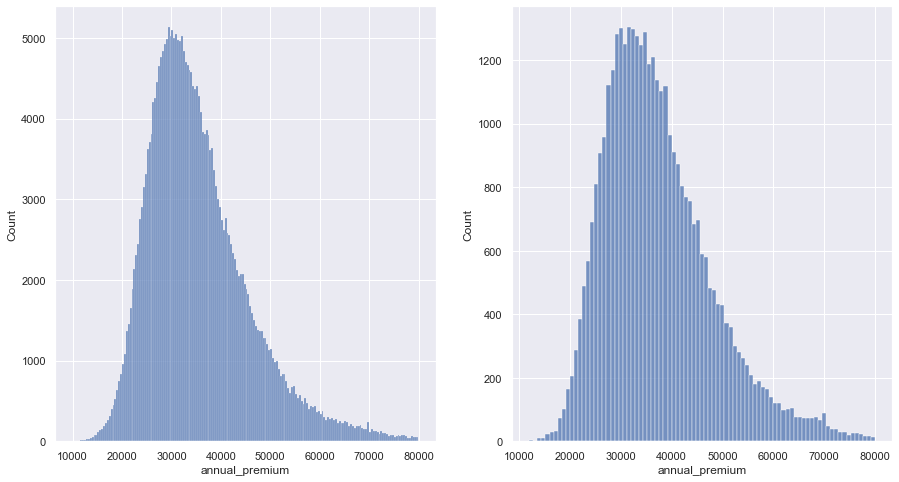

In [21]:
aux= df4[(df4['annual_premium'] < 80000) & (df4['annual_premium'] > 10000)]

plt.subplot(1,2,1)
aux00 = aux.loc[aux['response'] == 0,'annual_premium']
sns.histplot(aux00)


plt.subplot(1,2,2)
aux00 = aux.loc[aux['response'] == 1,'annual_premium']
sns.histplot(aux00)

In [22]:
#  'driving_license'

aux  = df4[['driving_license','response']].groupby('response').sum().reset_index()
aux['driving_license_perc'] = aux['driving_license']/aux['driving_license'].sum()


In [23]:
# 'region_code'

<AxesSubplot:xlabel='region_code', ylabel='id'>

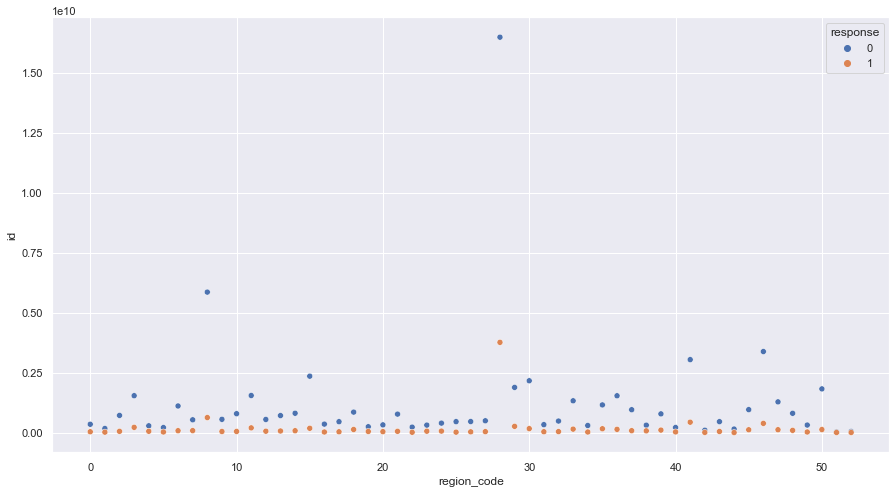

In [24]:
aux0 = df4[['id','region_code','response']].groupby( ['region_code','response'] ).sum().reset_index()
sns.scatterplot(x='region_code', y='id', hue='response', data=aux0)

In [25]:
#  'previously_insured'
pd.crosstab(df4['previously_insured'], df4['response'] ).apply(lambda x: x/x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [26]:
# 'vehicle_age'

df4[['vehicle_age', 'response']].value_counts(normalize=True).reset_index()

,vehicle_age,response,0
0,between_1_2_year,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2_year,1,0.091328
3,above_2_years,0,0.029663
4,below_1_year,1,0.018897
5,above_2_years,1,0.012338


In [27]:
# 'policy_sales_channel'

aux = df4[['policy_sales_channel','response']].groupby('policy_sales_channel').sum()
aux = df4[df4['response']==1]

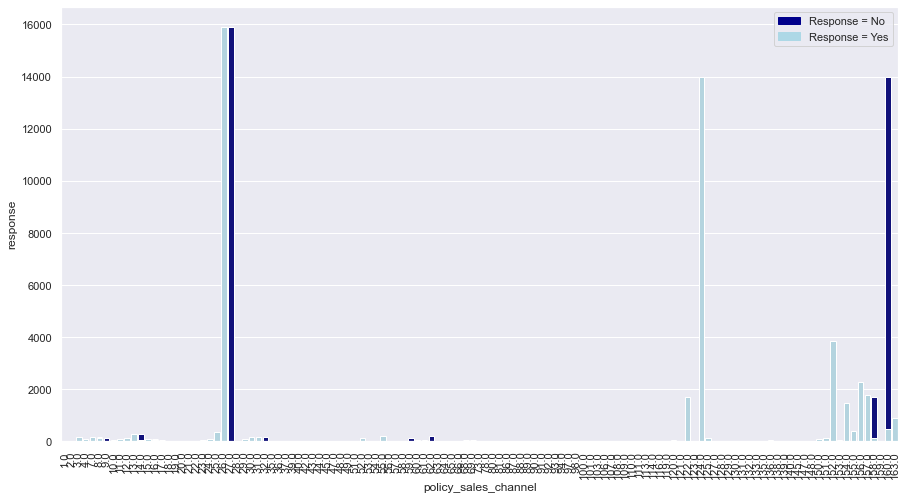

In [28]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")


# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
total = df4[['policy_sales_channel','response']].groupby('policy_sales_channel').sum().reset_index()

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="policy_sales_channel",  y="response", data=total, color='darkblue')

# bottom bar ->  take only smoker=Yes values from the data
response = df4[df4['response']==1]

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="policy_sales_channel", y="response", data=response, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Response = No')
bottom_bar = mpatches.Patch(color='lightblue', label='Response = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.xticks(rotation=90)


# show the graph
plt.show()

<AxesSubplot:xlabel='response', ylabel='vintage'>

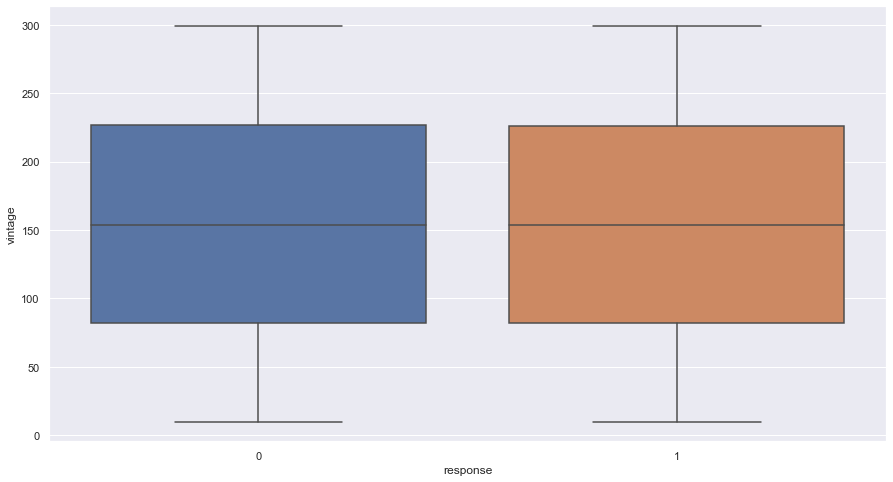

In [29]:
# 'vintage'
sns.boxplot(x='response', y='vintage', data=df4)

<AxesSubplot:xlabel='vintage', ylabel='Count'>

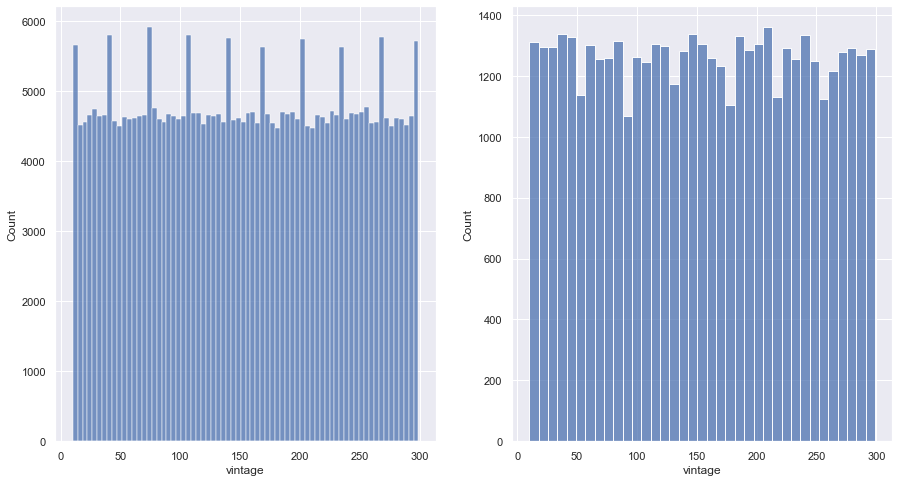

In [30]:

plt.subplot(1,2,1)
aux00 = df4.loc[df4['response'] == 0,'vintage']
sns.histplot(aux00)


plt.subplot(1,2,2)
aux00 = df4.loc[df4['response'] == 1,'vintage']
sns.histplot(aux00)

# 5.0 - DATA PREPARATION


In [10]:
df5 = df4.copy()

## Separaçao dadaos train e validation'

In [11]:
X = df4.drop('response', axis=1)
y = df4['response'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split( X, y, test_size=0.20 )

df5 = pd.concat([x_train,y_train], axis=1)

## 5.1 Stardardization

In [33]:
ss = pp.StandardScaler()

# annual_premium -

# vamos manter com outliers e fazer a padronização, pois no EDA vimos que ele tem uma distribuiçã proxima de uma normal quando removemos os autliers 

df5['annual_premium'] = ss.fit_transform(df5[['annual_premium']].values)
pickle.dump( ss, open( 'src/features/annual_premium_scaler.pkl', 'wb' ) )


## 5.1 Rescaling

In [34]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()
# 'age'

df5['age'] = mms_age.fit_transform(df5[['age']].values)
pickle.dump( mms_age, open( 'src/features/age_scaler.pkl','wb' ) )

# vintage
df5['vintage'] = mms_vintage.fit_transform(df5[['vintage']].values)
pickle.dump( mms_vintage, open( 'src/features/vintage_scaler.pkl','wb' ) )


## 5.1 Encoding

In [35]:
# colunas com valores de 0 e 1, já são consideradas encodadas, não necessita encoding (Label Encoding)

# driving _license - 0 e 1  - já está encodada 
# previously_insured -  0 e 1  - já está encodada 
# vehicle_damage -  0 e 1  - já está encodada 

# gender - One Hot Encoding / Target Encoding
target_encode_gender = df5.groupby('gender')['response'].mean()
df5.loc[: , 'gender'] = df5['gender'].map(target_encode_gender)
pickle.dump( target_encode_gender, open( 'src/features/target_encode_gender_scaler.pkl','wb' ) )


# region_code  - Frequncy Encoding / Target Encoding / Weighted Target Encoding - #- Não aplica-se One Hot Encoding quando se tem mais de 6 nives (valores unicos)
target_encode_region_code = df5.groupby('region_code')['response'].mean()
df5.loc[: , 'region_code'] = df5['region_code'].map(target_encode_region_code)
pickle.dump( target_encode_region_code, open( 'src/features/target_encode_region_code.pkl','wb' ) )

# vehicle_age - One Hot Encoding / Order Encoding / Frequency Encoding
df5 = pd.get_dummies( df5, prefix = 'vehicle_age', columns=['vehicle_age'] ) 

# policy_sales_channel Target Encoding / Frequency Encoding
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size()
df5.loc[: , 'policy_sales_channel'] = df5['policy_sales_channel'].map(fe_policy_sales_channel)
pickle.dump( fe_policy_sales_channel, open( 'src/features/fe_policy_sales_channel.pkl','wb' ) )


## 5.4 Validation Preparation

In [36]:
df5.columns

Index(['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
       'driving_license', 'vehicle_damage', 'previously_insured',
       'annual_premium', 'vintage', 'response', 'vehicle_age_above_2_years',
       'vehicle_age_below_1_year', 'vehicle_age_between_1_2_year'],
      dtype='object')

In [37]:
# gender 
x_validation.loc[:, 'gender'] = x_validation.loc[ : ,'gender'].map(target_encode_gender)


# age
x_validation.loc[:, 'age'] = mms_age.transform(x_validation[['age']].values)


# region_code
x_validation.loc[:, 'region_code'] = x_validation.loc[ : ,'region_code'].map(target_encode_region_code)


# vehicle_age 
x_validation = pd.get_dummies(x_validation, prefix='vechicle_age', columns=['vehicle_age'] )


# annual_premium
x_validation.loc[:,'annual_premium'] = ss.fit_transform(x_validation[['annual_premium']].values) 


# policy_sales_channel
x_validation.loc[ :, 'policy_sales_channel'] = x_validation.loc[ :, 'policy_sales_channel'].map(fe_policy_sales_channel)


# vintage
x_validation.loc[:, 'vintage'] = mms_vintage.transform(x_validation[['vintage']].values )


# fillna
x_validation = x_validation.fillna( 0 )



# 6.0 Feature Selection


## 6.1 Features importância

In [38]:
#model definition 
forest = en.ExtraTreesClassifier( n_estimators=250, random_state=0, n_jobs=-1 )

# data preparation
x_train_n = df5.drop(['id','response'], axis=1)
y_train_n = y_train.values
forest.fit( x_train_n,y_train_n )

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature Ranking: 
                        feature  importance
0                       vintage    0.272726
0                annual_premium    0.244133
0                           age    0.163636
0                   region_code    0.107926
0                vehicle_damage    0.067264
0          policy_sales_channel    0.060015
0            previously_insured    0.056786
0      vehicle_age_below_1_year    0.013288
0  vehicle_age_between_1_2_year    0.006497
0                        gender    0.004792
0     vehicle_age_above_2_years    0.002481
0               driving_license    0.000454


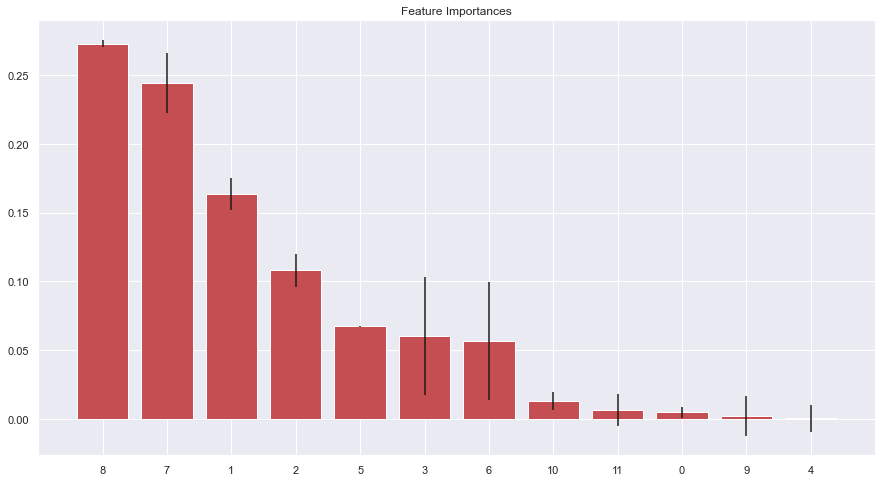

In [39]:
importances = forest.feature_importances_
std = np.std( [ tree.feature_importances_ for tree in forest.estimators_ ], axis=0 )
indices = np.argsort(importances)[::-1]

# print the feature ranking  
print('Feature Ranking: ')
df = pd.DataFrame()
for i, j in zip(x_train_n,forest.feature_importances_):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[0] )
    df= pd.concat( [df, aux], axis=0 )
print( df.sort_values( 'importance', ascending = False ) )

# plot the impurity-based feature importances of the forest 

plt.title('Feature Importances')
plt.bar(range(x_train_n.shape[1]),importances[indices], color ='r', yerr=std, align='center')
plt.xticks(range(x_train_n.shape[1]),indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

In [40]:
cols_selected = ['vintage', 'annual_premium', 'age', 'vehicle_damage', 'policy_sales_channel', 'previously_insured']

x_train = df5[cols_selected]
x_val = x_validation[cols_selected]
y_val = y_validation.copy()

## 7.1 KNN MODEL

In [41]:
# model definition
knn_model = nh.KNeighborsClassifier(n_neighbors=7)

# model training
knn_model.fit(x_train, y_train)

# model prediction - Poder de GENEREALIZAÇÃO
yhat_knn = knn_model.predict_proba( x_val )

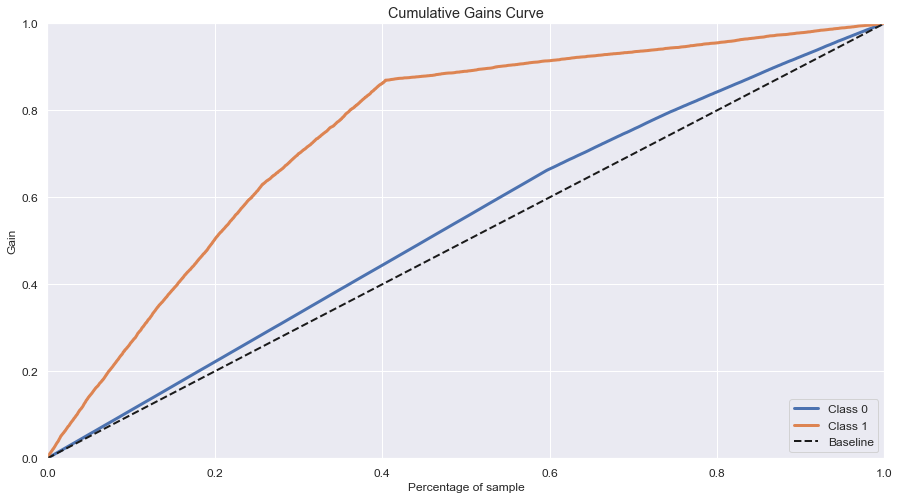

In [42]:
skplt.metrics.plot_cumulative_gain( y_val, yhat_knn);

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

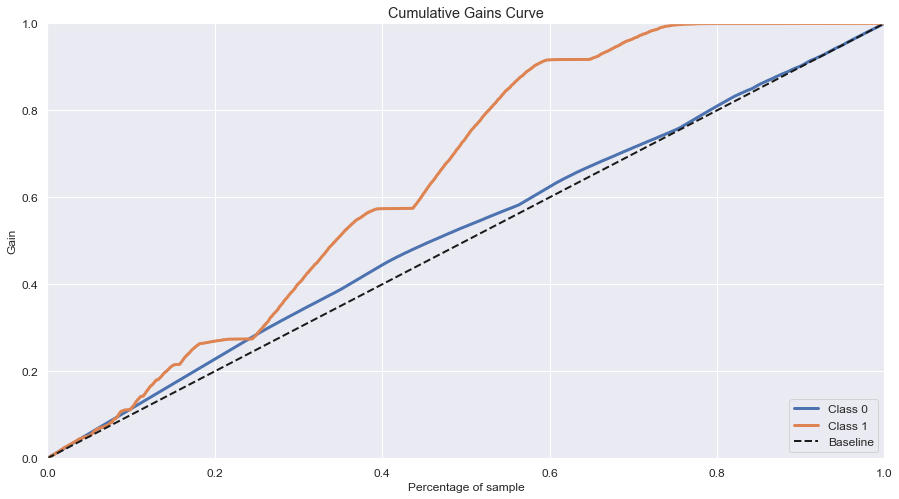

In [43]:
#model definition 
lr_model = lm.LogisticRegression( random_state=42 )

#model training 
lr_model.fit( x_train, y_train )

#model Prediction

yhat_lr = lr_model.predict_proba(x_val)

# Accumulative Gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_lr)


# Extra Trees 

In [45]:
# # model definition
# et = en.ExtraTreesClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

# # model fit

# et.fit( x_train,y_train )

# # model model predict
# yhat_et = et.predict_proba( x_val )

In [46]:
# # model result plot
# skplt.metrics.plot_cumulative_gain(y_val, yhat_et)

# 8.0 Model performance

In [47]:

def precision_at_k(data, k=2000):
    #reset_index
    data = data.reset_index(drop=True)
    
    # create ranking
    data['ranking']  = data.index + 1
    
    data['precision_at_k'] = data['response'].cumsum() / data['ranking']
    
    return data.loc[k , 'precision_at_k']

def recall_at_k(data, k=2000):
    #reset_index
    data = data.reset_index(drop=True)
    
    # create ranking
    data['ranking']  = data.index + 1
    
    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()
    
    return data.loc[k , 'recall_at_k']

In [48]:
df8 = x_validation.copy()
df8['response'] = y_val.copy()

# propesity score
df8['score'] = yhat_knn[: , 1].tolist()

# sorting clients by propensity scoce
df8 = df8.sort_values('score', ascending = False)

# compute precision at k
precision_at_50 = precision_at_k(df8 , k =40000)
print(f'Precision at k: {precision_at_50}')

# compute recall at k
recall_at_50 = recall_at_k(df8 , k =40000)
print(f'Recall at k: {recall_at_50}')


Precision at k: 0.2095697607559811
Recall at k: 0.8978258541287352


In [68]:
pickle.dump(lr_model, open( 'C:/Users/vande/repos/cross_sell/src/models/model_linear_regression.pkl','wb' ) )

In [28]:
# Class Creation

class HealthInsurance:
    def __init__( self ):
        self.home_path = 'C:/Users/vande/repos/cross_sell/'
        self.annual_premium_scaler = pickle.load( open( self.home_path + 'src/features/annual_premium_scaler.pkl' ) )
        self.age_scaler = pickle.load( open( self.home_path + 'src/features/age_scaler.pkl' ) )
        self.vintage_scaler = pickle.load( open( self.home_path + 'src/features/vintage_scaler.pkl' ) )
        self.target_encode_gender_scaler = pickle.load( open( self.home_path + 'src/features/target_encode_gender_scaler.pkl' ) )
        self.target_encode_region_code_scaler = pickle.load( open( self.home_path + 'src/features/target_encode_region_code_scaler.pkl' ) )
        self.fe_policy_sales_channel_scaler = pickle.load( open( self.home_path + 'src/features/fe_policy_sales_channel_scaler.pkl' ) ) 
        
    def data_engineering (self, df2 ):
        #vehicle age

        df2['vehicle_age'] = df2['vehicle_age'].apply( lambda x: 'below_1_year' if x ==  '< 1 Year' else 'between_1_2_year' if x == '1-2 Year' else 'above_2_years' )

        #vehicle damage
        df2['vehicle_damage'] = df2['vehicle_damage'].apply( lambda x: 1 if x ==  'Yes' else 0 )
            
        return df2
    
    def data_preparation( self, df5 ):
        # annual_premium - StandarScaler
        df5['annual_premium'] = self.annual_premium_scaler.transform(df5[['annual_premium']].values)

        # 'age'
        df5['age'] = self.age_scaler.transform(df5[['age']].values)

        # vintage
        df5['vintage'] = self.vintage_scaler.transform(df5[['vintage']].values)

        # gender - One Hot Encoding / Target Encoding
        df5.loc[: , 'gender'] = df5['gender'].map( self.target_encode_gender_scaler )

        # region_code  - Frequncy Encoding / Target Encoding / Weighted Target Encoding - #- Não aplica-se One Hot Encoding quando se tem mais de 6 nives (valores unicos)
        df5.loc[: , 'region_code'] = df5['region_code'].map( self.target_encode_region_code.scaler )

        # vehicle_age - One Hot Encoding / Order Encoding / Frequency Encoding
        df5 = pd.get_dummies( df5, prefix = 'vehicle_age', columns=['vehicle_age'] ) 

        # policy_sales_channel Target Encoding / Frequency Encoding
        df5.loc[: , 'policy_sales_channel'] = df5['policy_sales_channel'].map( self.fe_policy_sales_channel_scaler )
        
        #selected features
        cols_selected = ['vintage', 'annual_premium', 'age', 'vehicle_damage', 'policy_sales_channel', 'previously_insured']

        
        return df5[cols_selected]
        
    def get_prediction( self, model, original_data, test_data ):
        
        # get prediction for requested data
        pred = model.predict_proba( test_data)
        
        # adding into the original data
        original_data['score'] = pred
        
        #converting to json before sending back to requestor
        return original_data.to_json( orient= 'records', date_format='iso' )
        
        

# API Handler

In [48]:
import pickle 
import pandas as pd
from health_insurance_app.healthinsurance import HealthInsurance
from flask import Flask, request, Response

#loading model 
path = 'C:/Users/vande/repos/cross_sell/'
model = pickle.load( open( path + 'src/models/model_linear_regression.pkl', 'rb' ) )

app = Flask(__name__)

@app.route( '/healthinsurance/predict', methods=['POST'] )
def health_insurance_predict():
    test_json = request.get_json()
    
    if test_json: #if there is data
        if isinstance(test_json, dict):
            test_raw = pd.DataFrame( test_json, index[0] )
        else: # if there is more than 1 line use this way to convert 
            test_raw = pd.DataFrame( test_json, columns=test_json[0].keys() )
        
        # instantiate health insuranse class 
        pipeline = HealthInsurance()

        # feature engineering
        df1 = pipeline.data_engineering( test_raw )

        # data preparation
        df2 = pipeline.data_preparation( df1 )

        # prediction
        response = pipeline.get_prediction( df2 )

        return response

    else:
        return Response( '{}', status=200, mimetype='application/json' )

if __name__ == '__main__':
    app.run('0.0.0.0', debug=True)
    
        
    
    

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.100.78:5000 (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: 1

C:\Users\vande\repos\cross_sell\env-cross-sell\lib\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [12]:
import requests

# loading test dataset
df_test = x_validation

# getting 10 item for testing
df_test = df_test.sample(12)

# convert test dataset to json
data=json.dumps( df_test.to_dict( orient='records' ) )

data



'[{"id": 36868, "gender": "Female", "age": 51, "region_code": 8.0, "policy_sales_channel": 124.0, "driving_license": 1, "vehicle_age": "between_1_2_year", "vehicle_damage": 0, "previously_insured": 1, "annual_premium": 54202.0, "vintage": 194}, {"id": 153057, "gender": "Male", "age": 23, "region_code": 35.0, "policy_sales_channel": 152.0, "driving_license": 1, "vehicle_age": "below_1_year", "vehicle_damage": 0, "previously_insured": 1, "annual_premium": 38496.0, "vintage": 88}, {"id": 234096, "gender": "Female", "age": 25, "region_code": 11.0, "policy_sales_channel": 152.0, "driving_license": 1, "vehicle_age": "below_1_year", "vehicle_damage": 0, "previously_insured": 1, "annual_premium": 34849.0, "vintage": 141}, {"id": 129810, "gender": "Female", "age": 45, "region_code": 35.0, "policy_sales_channel": 124.0, "driving_license": 1, "vehicle_age": "between_1_2_year", "vehicle_damage": 0, "previously_insured": 1, "annual_premium": 29301.0, "vintage": 244}, {"id": 121743, "gender": "Femal

In [14]:
# API CALL 

url = 'https://health-insurance-vc.herokuapp.com/healthinsurance/predict'
header = { 'Content-type':'application/json'}

r = requests.post(url, data=data, headers=header)
print(f'Status Code {r.status_code}')

Status Code 200


In [35]:
df1 = pd.DataFrame(r.json(), columns=r.json()[0].keys())
df1.sort_values( 'score', ascending=False ).head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,score
6,310006,0.104106,0.523077,0.114637,133.0,1,above_2_years,0,0,-1.626686,0.318339,0.499490
5,210930,0.138878,0.661538,0.186894,42.0,1,above_2_years,0,0,0.677179,0.359862,0.499305
8,182347,0.138878,0.723077,0.186894,25.0,1,above_2_years,0,0,0.084925,0.408304,0.489714
2,368824,0.104106,0.707692,0.124450,13.0,1,above_2_years,0,0,0.795129,0.858131,0.489494
10,173728,0.104106,0.861538,0.186894,13.0,0,above_2_years,0,1,-0.438273,0.889273,0.489494


In [36]:
df_test.to_csv(r'data/testeexcel.csv',index=False)
# df_raw.to_csv('data/pa004.csv',index=False)